In [23]:
import pandas as pd

In [20]:
file="fire_nrt_V1_96617.csv"
df=pd.read_csv(file)

In [21]:
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [7]:
df_night=df[df["daynight"]=="N"]

In [14]:
incendios_en_la_noche=df_night.daynight.count()

In [9]:
df_day=df[df["daynight"]=="D"]

In [15]:
incendios_en_el_dia=df_day.daynight.count()

In [16]:
total_incendios=df.daynight.count()

In [17]:
porcentaje_incendios_dia=(incendios_en_el_dia*100)/(total_incendios)
print(porcentaje_incendios_dia)

48.3835412446654


In [18]:
porcentaje_incedios_noche=(incendios_en_la_noche*100)/(total_incendios)
print(porcentaje_incedios_noche)

51.6164587553346


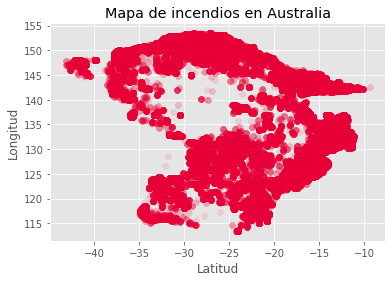

In [43]:
import matplotlib.pyplot as plt
x=df.latitude
y=df.longitude
plt.scatter(x=x,y=y,alpha=0.1,color="#ef0037")
plt.style.use("ggplot")
plt.title("Mapa de incendios en Australia")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

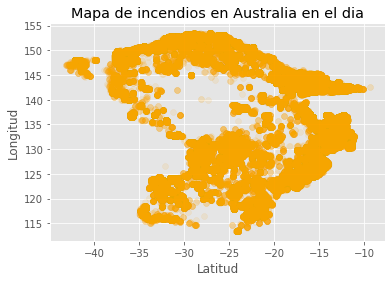

In [44]:
x=df_day.latitude
y=df_day.longitude
plt.scatter(x=x,y=y,alpha=0.1,color="orange")
plt.style.use("ggplot")
plt.title("Mapa de incendios en Australia en el dia")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

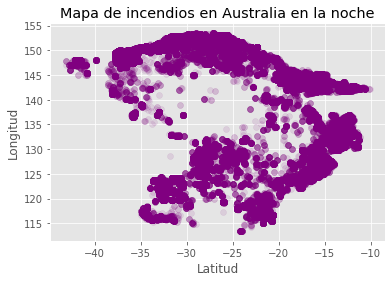

In [50]:
x=df_night.latitude
y=df_night.longitude
plt.scatter(x=x,y=y,alpha=0.1,color="purple")
plt.style.use("ggplot")
plt.title("Mapa de incendios en Australia en la noche")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

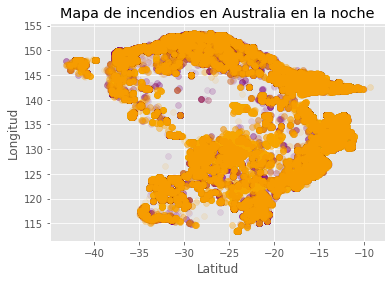

In [51]:
x=df_night.latitude
y=df_night.longitude
x2=df_day.latitude
y2=df_day.longitude
plt.scatter(x=x,y=y,alpha=0.1,color="purple")
plt.scatter(x=x2,y=y2,alpha=0.1,color="orange")
plt.style.use("ggplot")
plt.title("Mapa de incendios en Australia en la noche")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

### Conclusiones

Se presenta un mayor número de incendios en la noche